# EJ020101 Regresion LINEAL
La temperatura media del planeta Tierra y la concentración de dióxido de carbono CO2 de la atmósfera presentan una tendencia ascendente durante las últimas décadas.
*italicized text*
Anomalía de la temperatura media mensual en grados Celsius relativos a un periodo base
Fuente: https://datahub.io/core/global-temp#resource-annual
Tendencia del dióxido de carbono (CO2) de la atmósfera
Fuente: https://pkgstore.datahub.io/core/co2-ppm/co2-annmeanmlo_
json/data/31185d494d1a6f6431aee8b8004b6164/co2-annmean-mlo_json.json
El problema a realizar con esta práctica consiste en realizar un modelo de aprendizaje
supervisado basado en regresión, verificar si la relación entre la temperatura y CO2 se ajusta
bien a un modelo de regresión lineal o no, y utilizarlo para predecir valores futuros.

Este código incluye:

- Descarga de los datos desde URLs.
- Procesamiento y almacenamiento de datos en listas.
- Visualización de los datos de temperatura y CO2.
- Creación y entrenamiento de un modelo de regresión lineal.
- Visualización de la recta de regresión y cálculo del error.
- Predicción de valores futuros.


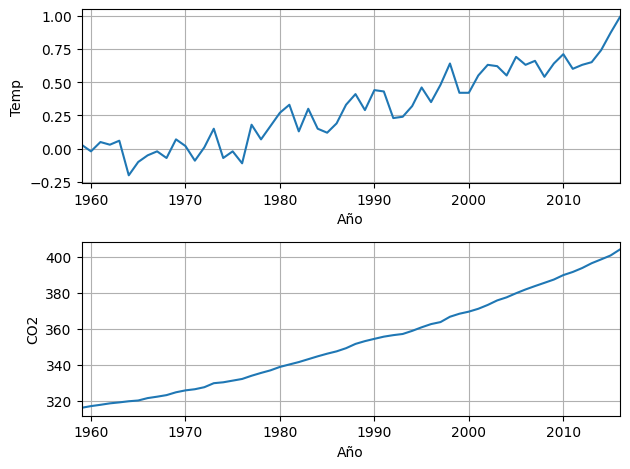

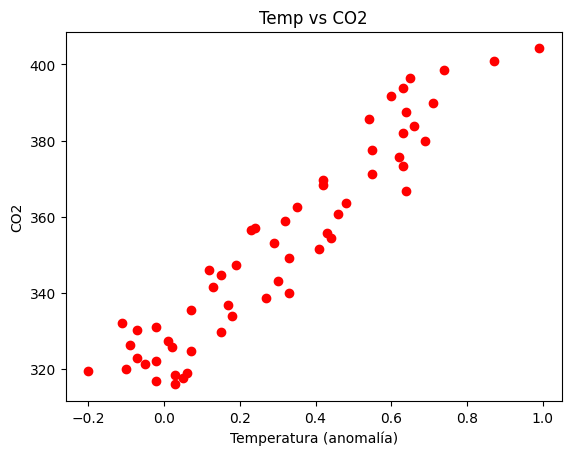

Pendiente: [[68.69130866]]
Término independiente: [327.32809716]
La recta de regresión es: y = 327.32809715796435 + 68.69130865829473 * X
ECM: 57.17
Coeficiente Correlación: 0.76


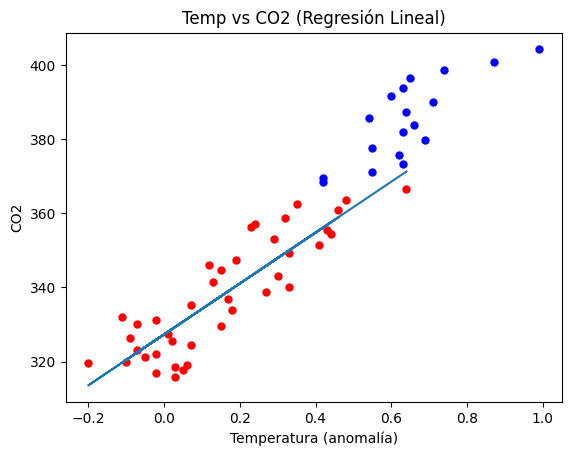

ECM (test): 227.81
Coeficiente Correlación (test): -0.94
La predicción de CO2 para una anomalía de 0.8ºC es: 382.28


In [3]:
# Importar las librerías necesarias
import urllib.request
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Descargar y leer los datos de temperatura y CO2
temp_url = "https://pkgstore.datahub.io/core/global-temp/annual_json/data/529e69dbd597709e36ce11a5d0bb7243/annual_json.json"
co2_url = "https://pkgstore.datahub.io/core/co2-ppm/co2-annmean-mlo_json/data/31185d494d1a6f6431aee8b8004b6164/co2-annmean-mlo_json.json"

with urllib.request.urlopen(temp_url) as url:
    temp_data = json.loads(url.read().decode())

with urllib.request.urlopen(co2_url) as url:
    co2_data = json.loads(url.read().decode())


# Registrar los valores en listas
temp = []
co2 = []
year = []

ntemp = len(temp_data)
nco2 = len(co2_data)

# Registro de temperaturas desde el año 1880
for i in range(ntemp):
    if temp_data[i]["Source"] == "GISTEMP":
        temp.append(temp_data[i]["Mean"])
        year.append(temp_data[i]["Year"])

# Las listas de temperatura y años están en orden decreciente (de 2016 a 1880)
# Las ordenamos en orden creciente
temp.reverse()
year.reverse()

# Nos quedamos con la serie desde 1959 hasta 2016
temp = temp[1959-1880:2016-1880+1]
year = year[1959-1880:2016-1880+1]

# Registro de CO2 desde el año 1959
for i in range(nco2):
    co2.append(co2_data[i]["Mean"])

# Visualizar la temperatura y CO2 por años
fig, axs = plt.subplots(2, 1)

# Temperatura
axs[0].plot(year, temp)
axs[0].set_xlim(1959, 2016)
axs[0].set_xlabel("Año")
axs[0].set_ylabel("Temp")
axs[0].grid(True)

# CO2
axs[1].plot(year, co2)
axs[1].set_xlim(1959, 2016)
axs[1].set_xlabel("Año")
axs[1].set_ylabel("CO2")
axs[1].grid(True)

fig.tight_layout()
plt.show()

# Representar la temperatura frente al CO2
plt.plot(temp, co2, 'ro')
plt.title("Temp vs CO2")
plt.xlabel("Temperatura (anomalía)")
plt.ylabel("CO2")
plt.show()

# Crear el DataFrame y realizar la regresión lineal
datos = {'temp': temp, 'co2': co2}
df = pd.DataFrame(datos)

X = df[['temp']]
y = df[['co2']]

# Dividir los datos en entrenamiento y test
X_train = np.array(X[:40])
y_train = np.array(y[:40])

X_test = np.array(X[40:])
y_test = np.array(y[40:])

# Crear y entrenar el modelo de regresión lineal
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Realizar predicciones
y_pred = regr.predict(X_train)

# Obtener los parámetros del modelo
t1 = regr.coef_
t0 = regr.intercept_
print(f'Pendiente: {t1}')
print(f'Término independiente: {t0}')
print(f'La recta de regresión es: y = {t0[0]} + {t1[0][0]} * X')

# Cálculo del error
print(f"ECM: {mean_squared_error(y_train, y_pred):.2f}")
print(f'Coeficiente Correlación: {r2_score(y_train, y_pred):.2f}')

# Visualización de los resultados
plt.plot(X_train, y_train, 'ro', markersize=5)
plt.plot(X_test, y_test, 'bo', markersize=5)
plt.plot(X_train, y_pred)
plt.title("Temp vs CO2 (Regresión Lineal)")
plt.xlabel("Temperatura (anomalía)")
plt.ylabel("CO2")
plt.show()

# Predicción para valores de test
y_pred_test = regr.predict(X_test)
print(f"ECM (test): {mean_squared_error(y_test, y_pred_test):.2f}")
print(f'Coeficiente Correlación (test): {r2_score(y_test, y_pred_test):.2f}')

# Predicción de CO2 para una anomalía de 0.8
y_pred_0_8 = regr.predict([[0.8]])
print(f'La predicción de CO2 para una anomalía de 0.8ºC es: {y_pred_0_8[0][0]:.2f}')
